In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# diamonds 데이터 불러오기
df = pd.read_csv(r'C:\skproject\pyproject\diamonds.csv')
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# carat 기준 IQR로 이상치 제거
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'carat 이상치 하한: {lower_bound}')
print(f'carat 이상치 상한: {upper_bound}')

df_no_outlier = df[(df['carat'] >= lower_bound) & (df['carat'] <= upper_bound)]
print('이상치 제거 후 데이터 개수:', len(df_no_outlier))
df_no_outlier.head()


carat 이상치 하한: -0.5599999999999999
carat 이상치 상한: 2.0
이상치 제거 후 데이터 개수: 52051


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# cut, color, clarity Label Encoding
for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df_no_outlier[col] = le.fit_transform(df_no_outlier[col])

df_no_outlier.head()


C:\Users\User\AppData\Local\Temp\ipykernel_10036\3889031189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier[col] = le.fit_transform(df_no_outlier[col])
C:\Users\User\AppData\Local\Temp\ipykernel_10036\3889031189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier[col] = le.fit_transform(df_no_outlier[col])
C:\Users\User\AppData\Local\Temp\ipykernel_10036\3889031189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# X: price 제외 모든 열, y: price
X = df_no_outlier.drop('price', axis=1)
y = df_no_outlier['price']


In [6]:
# train, test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# 예측 및 평가
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')


MSE: 1470219.99
RMSE: 1212.53
R^2: 0.87


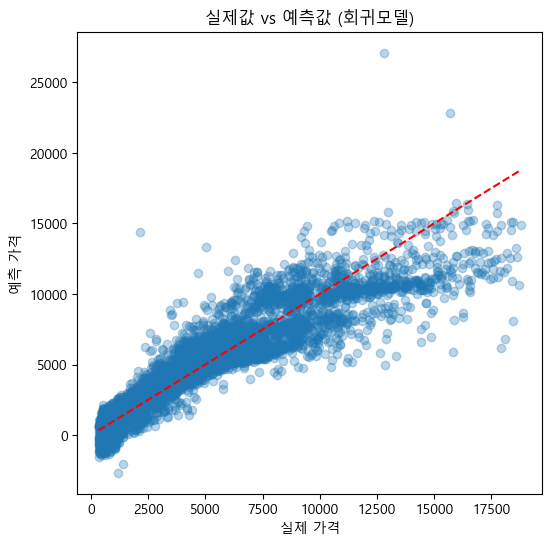

In [11]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 깨짐 방지

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선
plt.xlabel('실제 가격')
plt.ylabel('예측 가격')
plt.title('실제값 vs 예측값 (회귀모델)')
plt.show()
